This is an Exploratory Data Analysis of the data I found on Kaggle https://www.kaggle.com/c/petfinder-adoption-prediction/data. I find this topic interesting and so decided to perform an Exploratory Data Analysis using Python.

Let us first see the general information about the data.


In [3]:
import pandas as pd
data=pd.read_csv("..\\all\\train\\train.csv")
#Print get the number of samples
print("Shape of traning data",data.shape)

Shape of traning data (14993, 24)


In [5]:
#First see what the data looks like
print(data.head())

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize      ...        Health  Quantity  Fee  State  \
0             1      ...             1         1  100  41326   
1             2      ...             1         1    0  41401   
2             2      ...             1         1    0  41326   
3             2      ...             1         1  150  41401   
4             2      ...             1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa

In [6]:
print(data.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

We see that the mean age is 10 months whereas the the median month is around 10 months, telling there are quite a bit of outliers in the Age data.
Also, on an average the pets have 3 photos each.
Next, let us plot how is the distribution of Adoption Speed

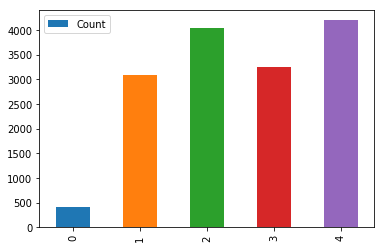

In [10]:
%matplotlib inline
df_count=data.groupby(["AdoptionSpeed"]).size().reset_index(name='Count')
df_count.plot.bar(y='Count');

We see that the distribution is pretty evened out. Except for the very few 'Unspecified' Speeds, pretty much all other types of Adoption Speeds have balanced number of instances. So, the data doesn't suffer from imbalance. One less thing to worry about.

Next, let us check out what is the Breed Distribution for Cats

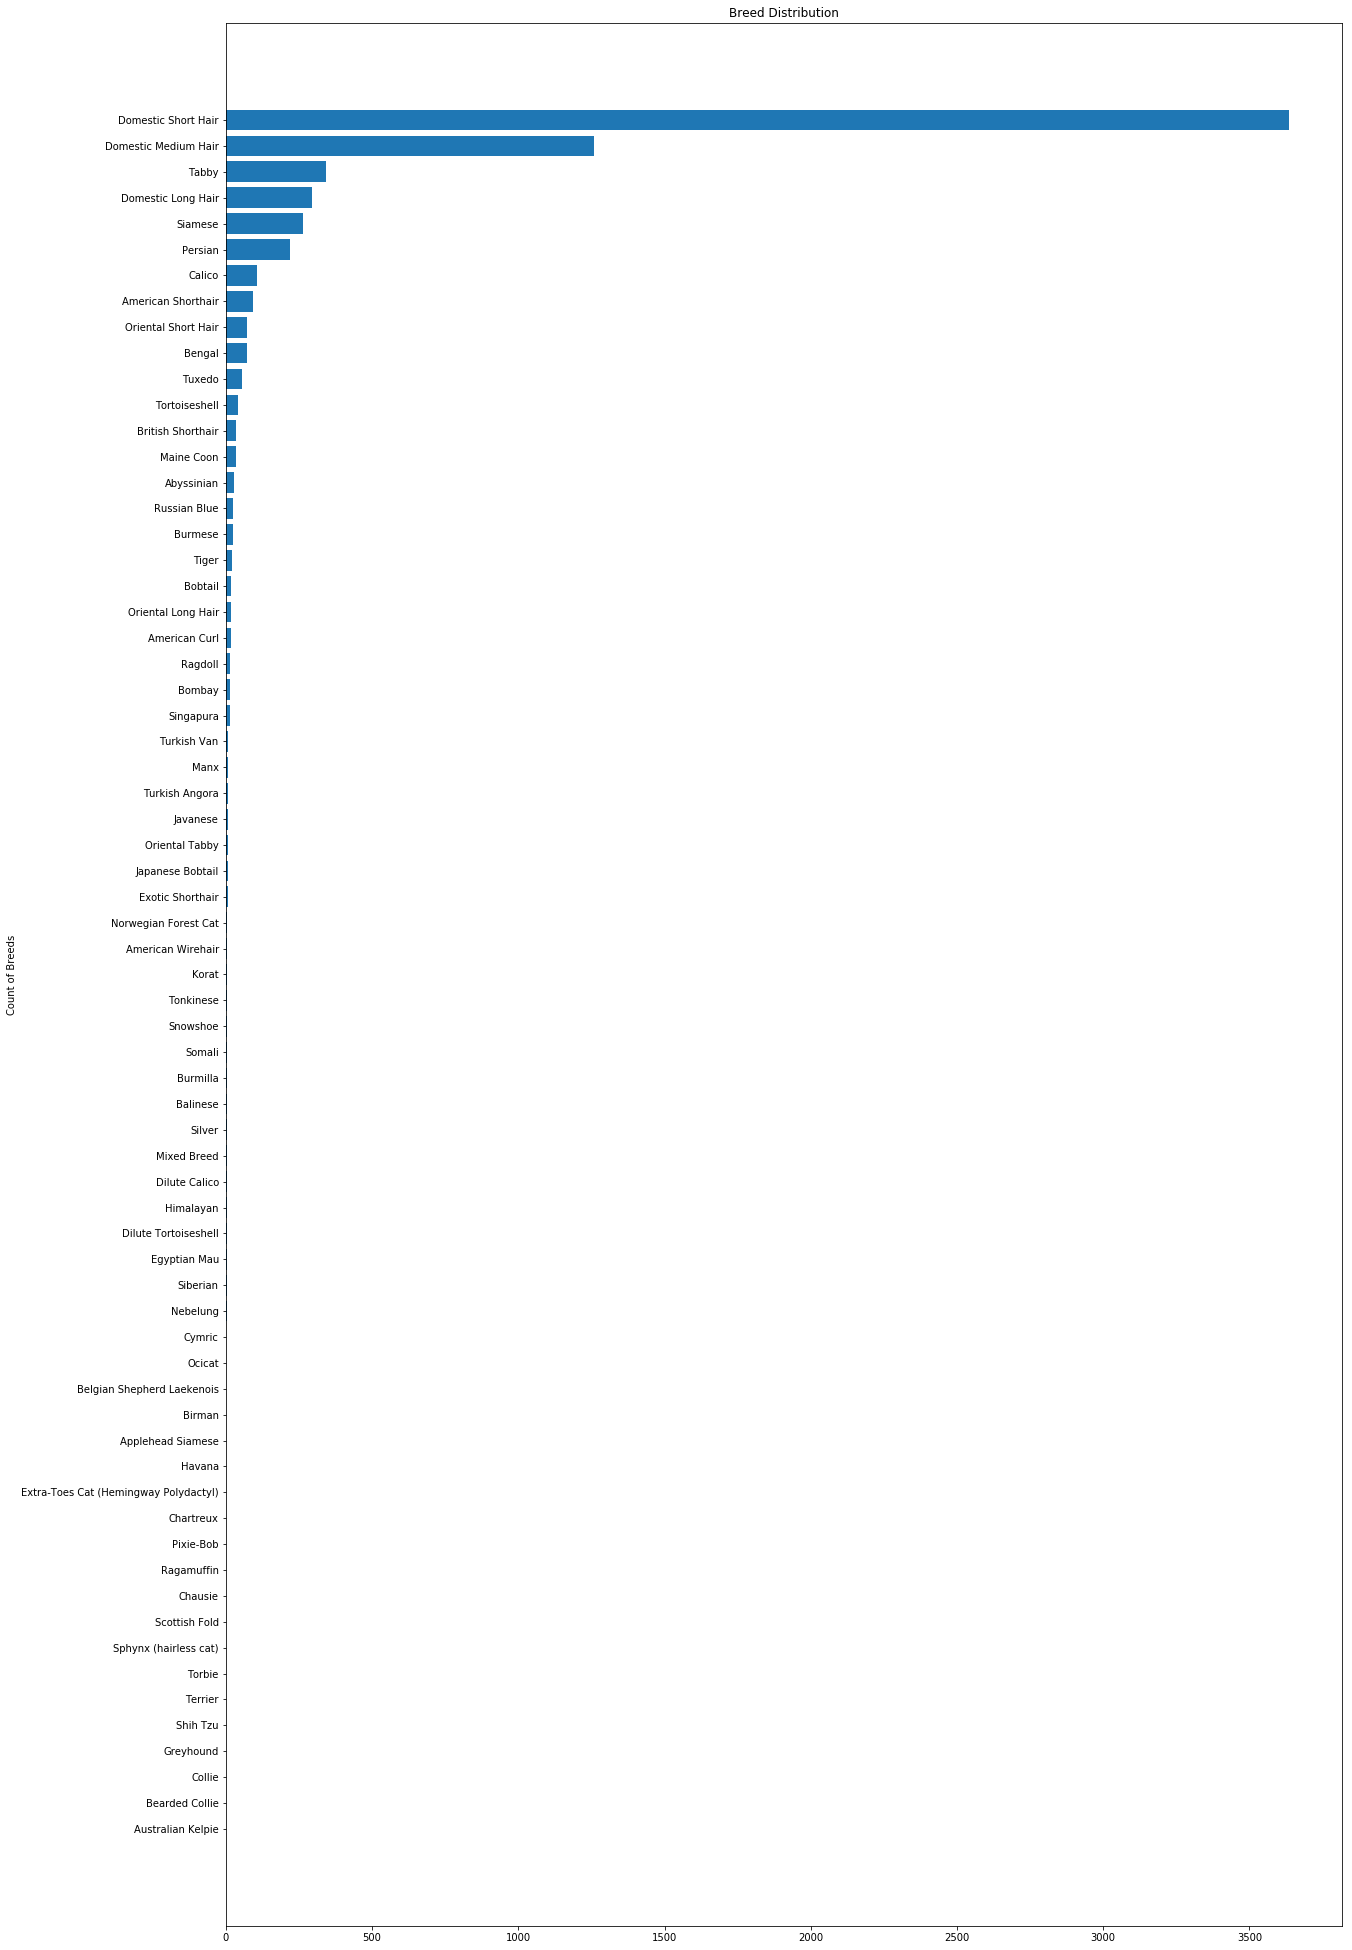

In [19]:
breedLabels=pd.read_csv('..\\all\\breed_labels.csv')
df_breed_count=data[data['Type']==2].groupby('Breed1').size().reset_index(name="count").merge(breedLabels,left_on='Breed1',right_on='BreedID',how='inner').sort_values(by=['count'])
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.barh(df_breed_count['BreedName'],df_breed_count['count'],align='center')
plt.ylabel('Count of Breeds')
plt.title('Breed Distribution')
fig = plt.gcf()
fig.set_size_inches(20, 35)

We see that Domestic Short Hair and Domestic Medium Hair are the most common types of breeds adopted among cats.

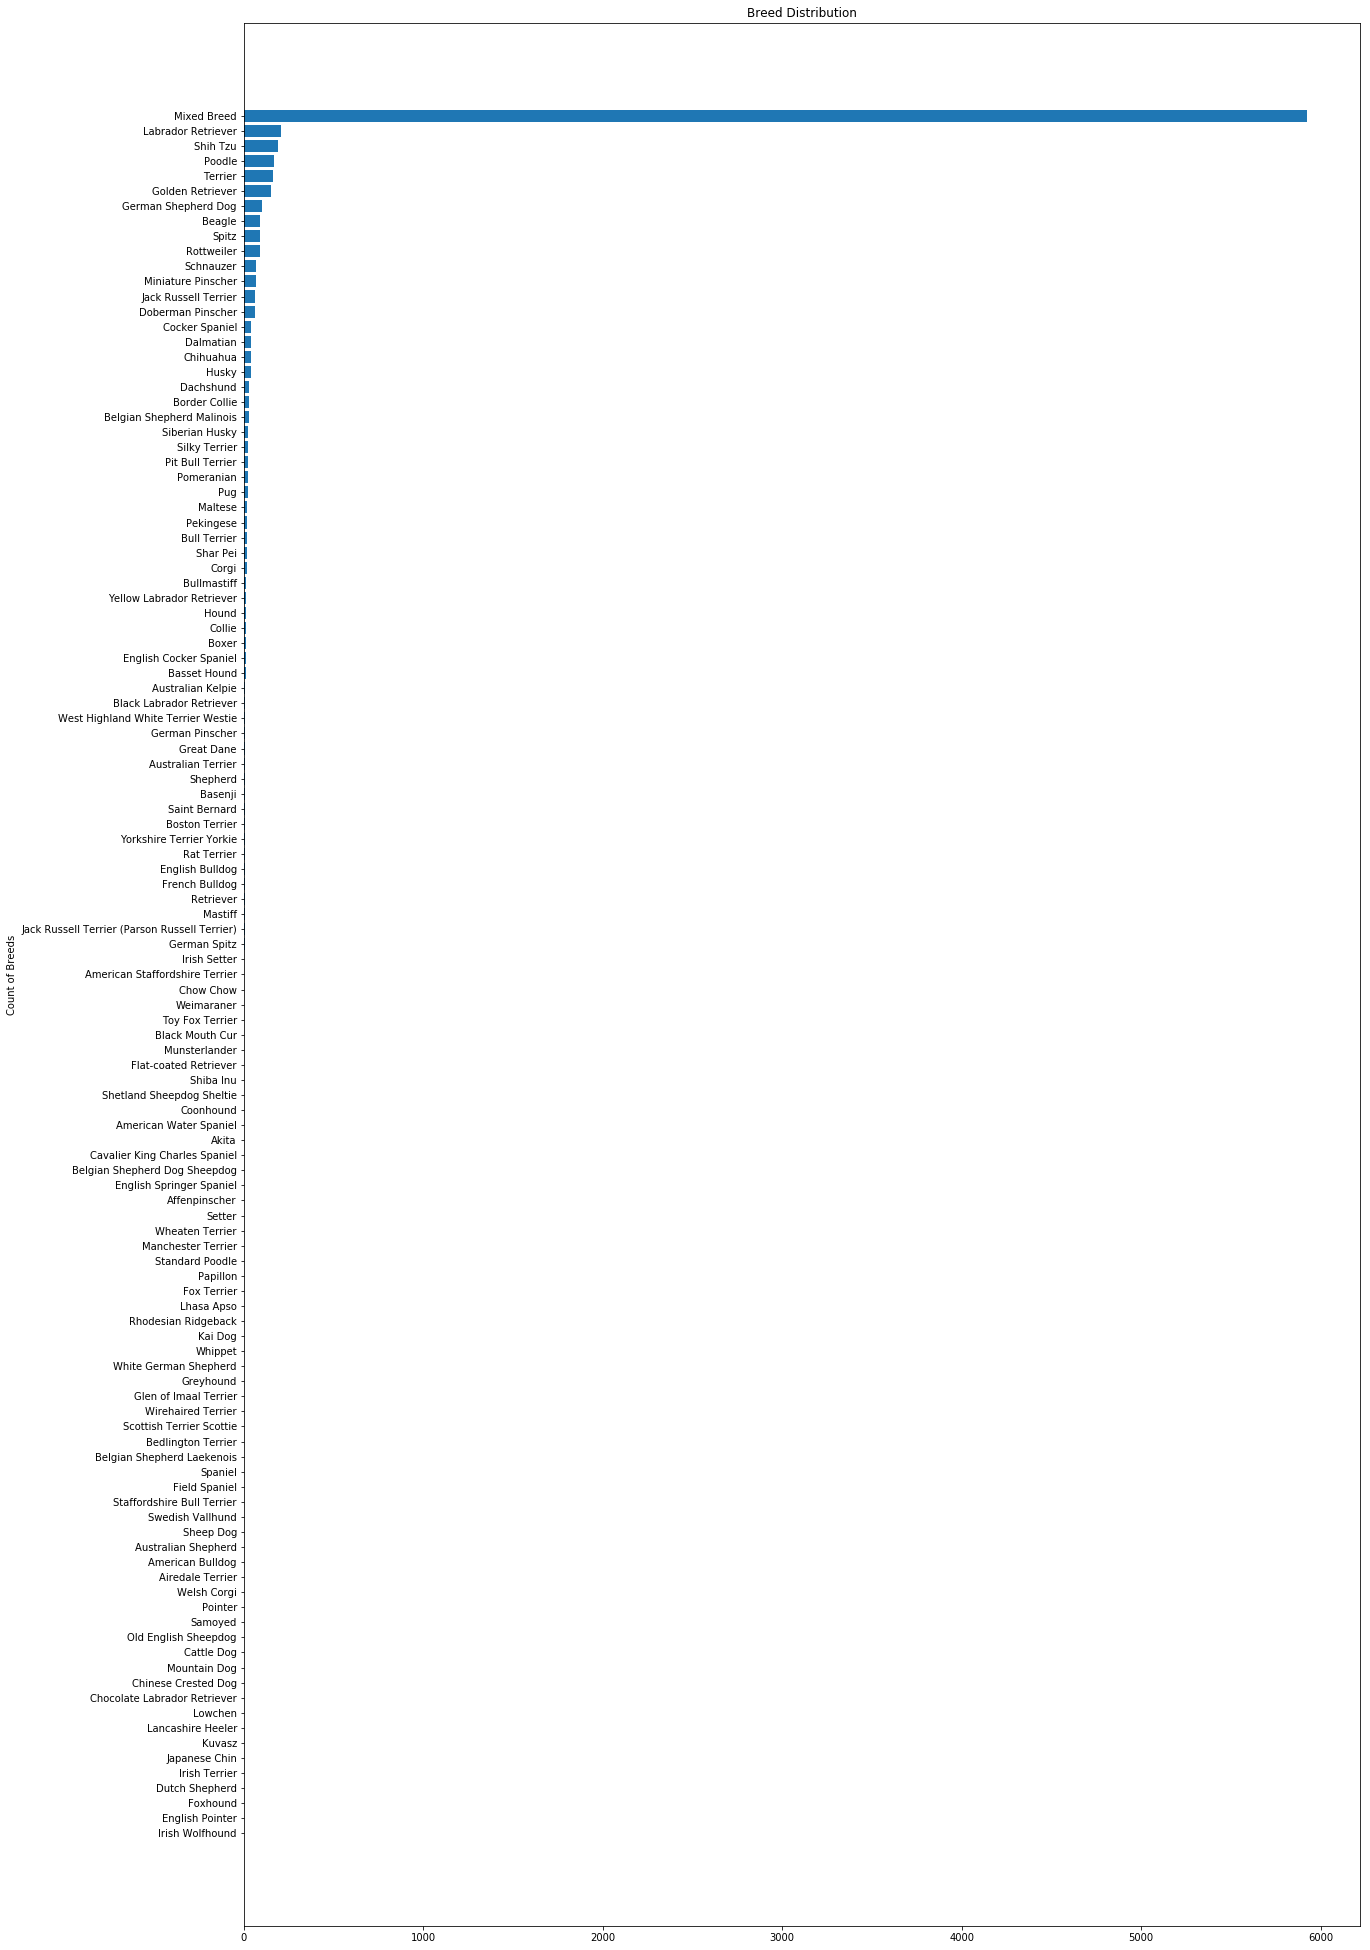

In [21]:
breedLabels=pd.read_csv('..\\all\\breed_labels.csv')
df_breed_count=data[data['Type']==1].groupby('Breed1').size().reset_index(name="count").merge(breedLabels,left_on='Breed1',right_on='BreedID',how='inner').sort_values(by=['count'])
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.barh(df_breed_count['BreedName'],df_breed_count['count'],align='center')
plt.ylabel('Count of Breeds')
plt.title('Breed Distribution')
fig = plt.gcf()
fig.set_size_inches(20, 35)

We see that Mixed Breeds and Labrador Retriever are the most common types of Dogs adopted.
Next we see what is the distribution of Male and Female Pets.

Text(0.5, 1.0, 'Gender Distribution')

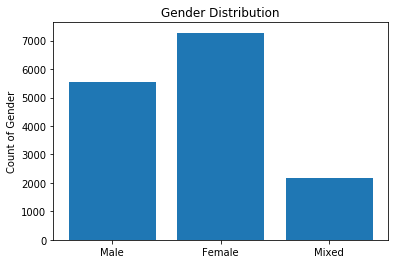

In [22]:
df_gender_count=data.groupby('Gender').size().reset_index(name='count')
df_gender_count['Gender']=df_gender_count['Gender'].map({1:'Male',2:'Female',3:'Mixed'})
plt.bar(df_gender_count['Gender'],df_gender_count['count'])
plt.ylabel('Count of Gender')
plt.title('Gender Distribution')


Female pets outnumber Male pets by ~2000. 
Next, let us see what is the distribution of pets from each state in Malaysia.

Text(0.5, 1.0, 'State Distribution')

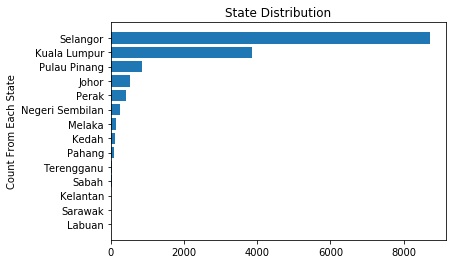

In [23]:
#Distribution of States
state_labels=pd.read_csv("..\\all\\state_labels.csv")
df_state_count=data.groupby('State').size().reset_index(name='count').merge(state_labels,left_on='State',right_on='StateID',how='inner').sort_values(by=['count'])
plt.barh(df_state_count['StateName'],df_state_count['count'])
plt.ylabel('Count From Each State')
plt.title('State Distribution')

Let us see how fast pets get adopted in each state

   Johor  Kedah  Kelantan  Kuala Lumpur  Labuan  Melaka  Negeri Sembilan  \
0      4      2       1.0            43     1.0       2                4   
1     62     14       2.0           366     1.0      19               36   
2     70     15       NaN           449     NaN      21               36   
3     57     10       NaN           360     NaN      23               20   
4     85     16       NaN           469     NaN      22               46   

   Pahang  Perak  Pulau Pinang  Sabah  Sarawak  Selangor  Terengganu  
0       1     14            14    3.0      1.0       140         3.0  
1       8     73           126    1.0      1.0       995         NaN  
2       7     82           174    1.0      NaN      1323         NaN  
3       5     67           136    NaN      NaN      1054         NaN  
4      13     92           161    NaN      NaN      1381         NaN  


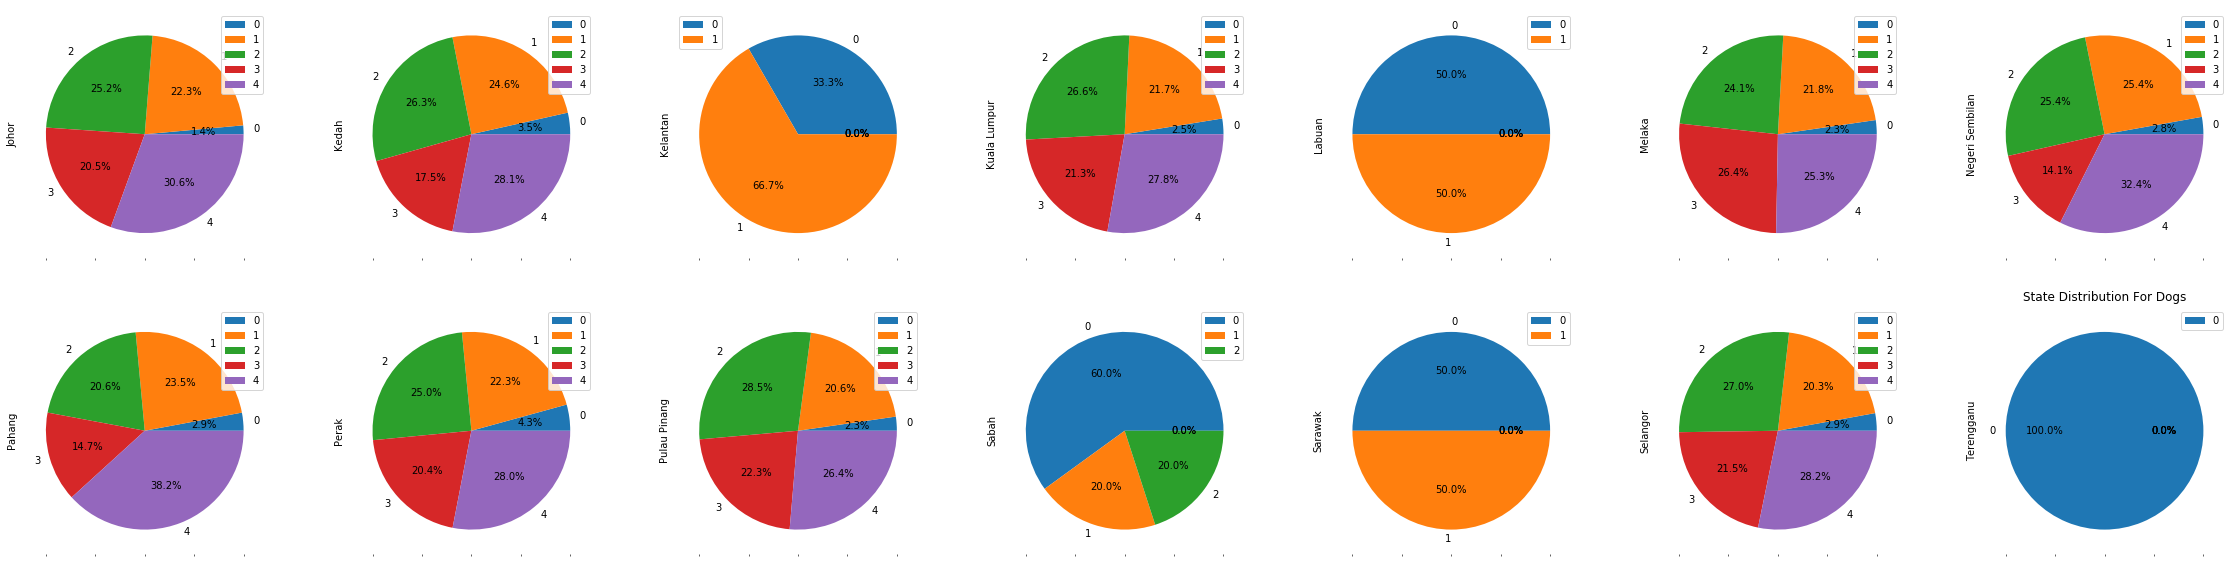

In [55]:
df2=pd.DataFrame();
data2=data.merge(state_labels,left_on='State',right_on='StateID',how='inner');
for j in sorted(data2['StateName'].unique()):
    df=data[(data2["Type"]==1) & (data2['StateName']==j)]
    df2[str(j)]=((df.groupby('AdoptionSpeed').size().reset_index(name='Count'))['Count'])
    #print(df2)
print(df2)
#df2=df2.merge(state_labels,left_on='State',right_on='StateID',how='inner')    
df2.plot.pie(subplots=True,figsize=(40,10),autopct='%1.1f%%',layout=(2,7))
plt.title("State Distribution For Dogs");

We see that in state Terrenganu, all dogs were Adopted the day they came in. Also in states like Sabah,Kelantan,labuan and Sarawak, the dogs are getting adopted sooner and all of the dogs have been adopted.
Let us see a similar distribution for cats.


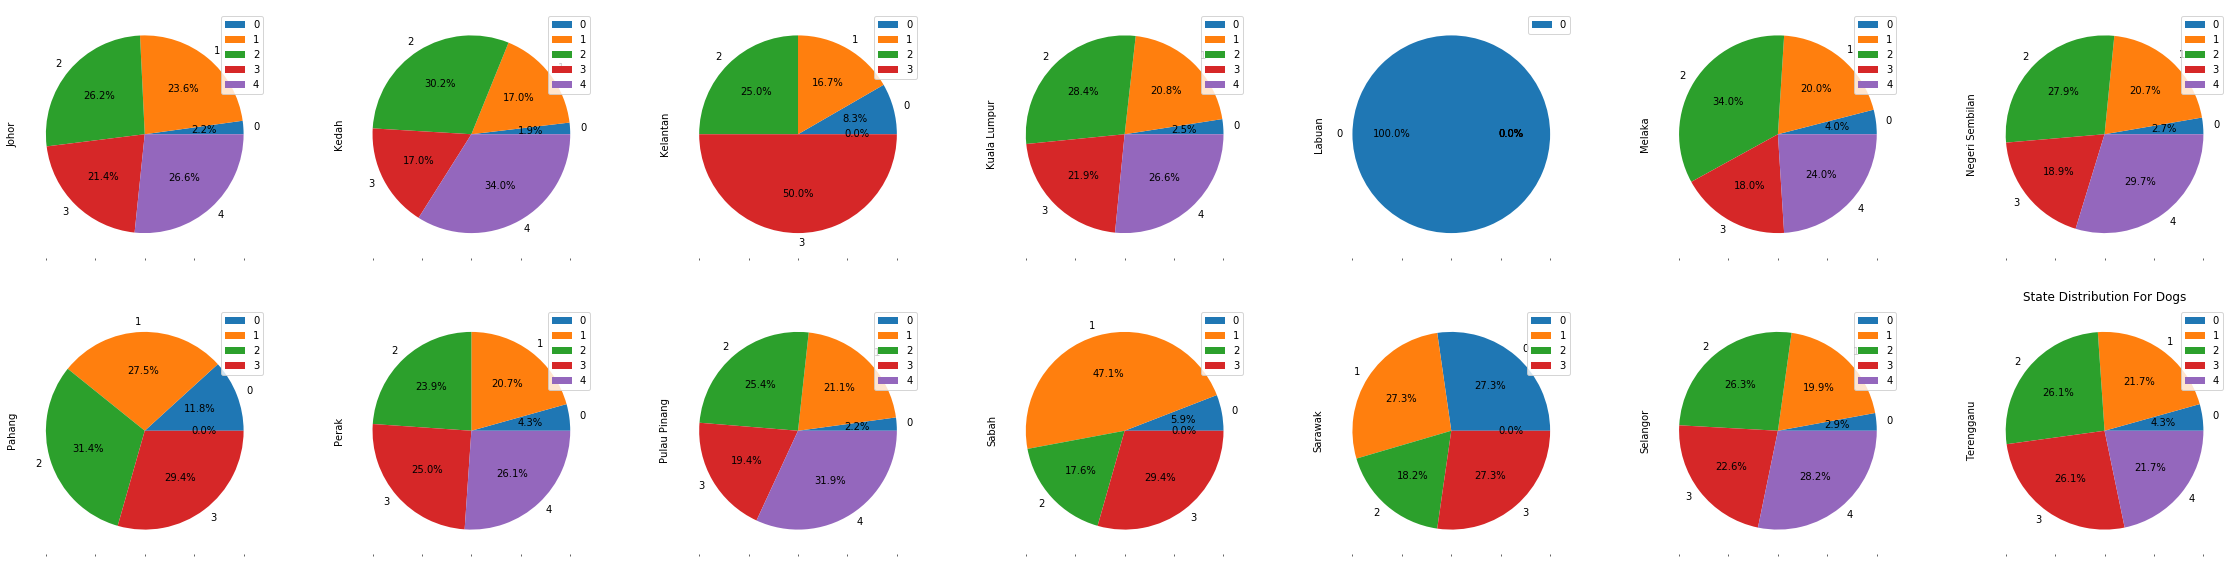

In [59]:
df2=pd.DataFrame();
data2=data.merge(state_labels,left_on='State',right_on='StateID',how='inner');
for j in sorted(data2['StateName'].unique()):
    df=data[(data2["Type"]==2) & (data2['StateName']==j)]
    df2[str(j)]=((df.groupby('AdoptionSpeed').size().reset_index(name='Count'))['Count'])
    
#df2=df2.merge(state_labels,left_on='State',right_on='StateID',how='inner')    
df2.plot.pie(subplots=True,figsize=(40,10),autopct='%1.1f%%',layout=(2,7))
plt.title("State Distribution For Dogs");

We see cats are more popular in Lebuan and in general less adopted within first 7 days in most of the other states.
Next, let us see what is the effect of Fur Length, Sterlization, Vaccination, Matirity Size and Health have onthe Adoption Speed

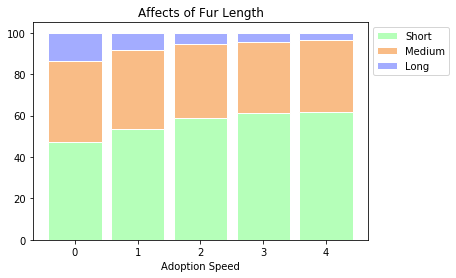

In [62]:
FurDist={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('FurLength').size()
    FurDist[str(i)]=trial
df=pd.DataFrame.from_dict(FurDist).T.rename(columns={0:'Not Specified',1:'Small',2:'Medium',3:'Long'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k in zip(df['Small'],df['Medium'],df['Long'],)];
greenBars=[i/j*100 for i,j in zip(df['Small'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['Medium'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Long'],totals)];
barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='Short');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='Medium');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='Long');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Affects of Fur Length");
plt.xlabel("Adoption Speed");
plt.show()

We observe, that Medium and Long Fur Pets are slightly mre preferred over short Fur Pets.

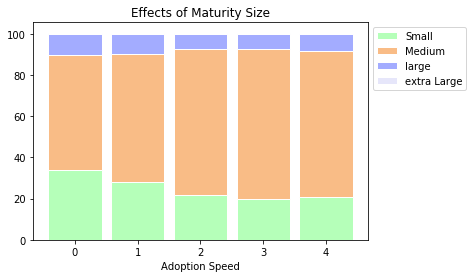

In [64]:
maturityDist={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('MaturitySize').size()
    maturityDist[str(i)]=trial
df=pd.DataFrame.from_dict(maturityDist).T.rename(columns={1:'Small',2:'Medium',3:'Large',4:'Extra Large'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k,l in zip(df['Small'],df['Medium'],df['Large'],df['Extra Large'],)];
greenBars=[i/j*100 for i,j in zip(df['Small'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['Medium'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Large'],totals)];
purpleBars=[i/j*100 for i,j in zip(df['Extra Large'],totals)];
barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='Small');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='Medium');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='large');
plt.bar(names,purpleBars,bottom=[i+j+k for i,j,k in zip(greenBars,orangeBars,blueBars)],color="#E6E6FA",edgecolor='white',width=barWidth,label='extra Large');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Effects of Maturity Size")
plt.xlabel("Adoption Speed");
plt.show()

We see the general trend is that Small Pets and Large Pets get Adopted faster than Medium Dogs.


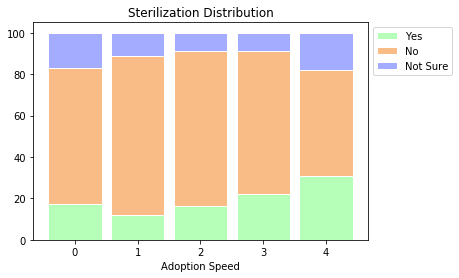

In [66]:
SterDist={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('Sterilized').size()
    SterDist[str(i)]=trial

df=pd.DataFrame.from_dict(SterDist).T.rename(columns={1:'Yes',2:'No',3:'Not Sure'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k in zip(df['Yes'],df['No'],df['Not Sure'])];
greenBars=[i/j*100 for i,j in zip(df['Yes'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['No'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Not Sure'],totals)];
barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='Yes');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='No');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='Not Sure');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.xlabel("Adoption Speed");
plt.title("Sterilization Distribution")
plt.show()

We see that surprisingluly, the UnSterlized Pets stayed Longer. This may be because the pets adopted sooner didnt have enough time to be sterilized. A similar pattern is seen with Vaccination and Deworming as seen below.

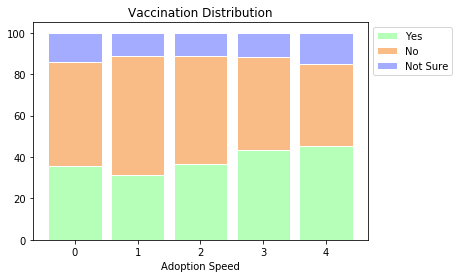

In [67]:

VaccineDist={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('Vaccinated').size()
    VaccineDist[str(i)]=trial
df=pd.DataFrame.from_dict(VaccineDist).T.rename(columns={1:'Yes',2:'No',3:'Not Sure'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k in zip(df['Yes'],df['No'],df['Not Sure'])];
greenBars=[i/j*100 for i,j in zip(df['Yes'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['No'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Not Sure'],totals)];
barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='Yes');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='No');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='Not Sure');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.xlabel("Adoption Speed");
plt.title("Vaccination Distribution")
plt.show()

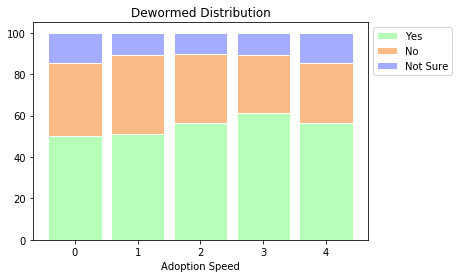

In [69]:
Dewormed={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('Dewormed').size()
    Dewormed[str(i)]=trial
df=pd.DataFrame.from_dict(Dewormed).T.rename(columns={1:'Yes',2:'No',3:'Not Sure'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k in zip(df['Yes'],df['No'],df['Not Sure'])];
greenBars=[i/j*100 for i,j in zip(df['Yes'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['No'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Not Sure'],totals)];
barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='Yes');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='No');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='Not Sure');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.xlabel("Adoption Speed");
plt.title("Dewormed Distribution")
plt.show()

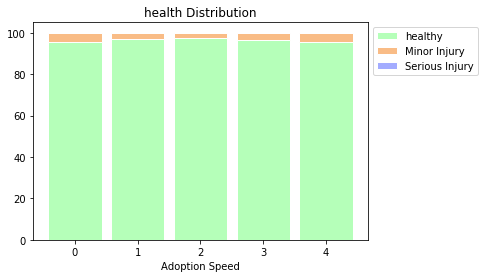

In [70]:
health={}
for i in sorted(data['AdoptionSpeed'].unique()):
    trial=data[data['AdoptionSpeed']==i].groupby('Health').size()
    health[str(i)]=trial
df=pd.DataFrame.from_dict(health).T.rename(columns={1:'Healthy',2:'Minor Injury',3:'Serious Injury',0:'Not Specified'}).rename_axis('AdoptionSpeed')


r = [0,1,2,3,4]

totals=[i+j+k for i,j,k in zip(df['Healthy'],df['Minor Injury'],df['Serious Injury'])];
greenBars=[i/j*100 for i,j in zip(df['Healthy'],totals)]
orangeBars=[i/j*100 for i,j in zip(df['Minor Injury'],totals)]
blueBars=[i/j*100 for i,j in zip(df['Serious Injury'],totals)];

barWidth=0.85
names=list(df.index);
plt.bar(names,greenBars,color="#b5ffb9",edgecolor='white',width=barWidth,label='healthy');
plt.bar(names,orangeBars,bottom=greenBars,color="#f9bc86",edgecolor='white',width=barWidth,label='Minor Injury');
plt.bar(names,blueBars,bottom=[i+j for i,j in zip(greenBars,orangeBars)],color="#a3acff",edgecolor='white',width=barWidth,label='Serious Injury');
# Custom x axis
plt.xticks(r, names)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.xlabel("Adoption Speed");
plt.title("health Distribution")
plt.show()

We see that a mojority of the pets are Healthy. Not much else to discover here.
Next, let us see what role does Number of Photos have in the Adoption Speed.

(3500, 24)


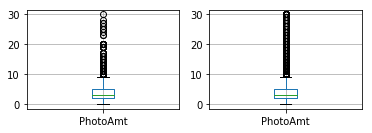

In [100]:
df=data[data["AdoptionSpeed"] <=1]
print(df.shape)
fig, axes = plt.subplots(nrows=1, ncols=2)
df2=data[data["AdoptionSpeed"] >1]

plt.figure(1)
plt.subplot(2,2,1)
df.boxplot(column=['PhotoAmt'],figsize=(7,7))
plt.subplot(2,2,2)
df2.boxplot(column=['PhotoAmt'],figsize=(7,7))

We see that the number of photos for the pets adopter faster isn't much different from the pets that were adopted later.
Next let us check what is the timeline of adoption of pets based on Gender

In [101]:
df=data[(data["Gender"] ==2) & (data['Type']==1)];
print("Percent of Female Dogs That were Adpted in 30 days",(df[df['AdoptionSpeed']<=2].shape[0]/df.shape[0])*100)


df=data[(data["Gender"] ==1) & (data['Type']==1)];
print("Percent of male Dogs That were Adpted in 30 days",(df[df['AdoptionSpeed']<=2].shape[0]/df.shape[0])*100)


df=data[(data["Gender"] ==2) & (data['Type']==2)];
print("Percent of Female Cats That were Adpted in 30 days",(df[df['AdoptionSpeed']<=2].shape[0]/df.shape[0])*100)




df=data[(data["Gender"] ==1) & (data['Type']==2)];
print("Percent of male Cats That were Adpted in 30 days",(df[df['AdoptionSpeed']<=2].shape[0]/df.shape[0])*100)


Percent of Female Dogs That were Adpted in 30 days 43.36782690498589
Percent of male Dogs That were Adpted in 30 days 51.846921797004995
Percent of Female Cats That were Adpted in 30 days 54.11570247933884
Percent of male Cats That were Adpted in 30 days 57.803239826155675


We see that male Dogs get adopted significantly faster than Female Dogs whereas this difference is not so stark in cats.
We next see if Color of the Pets have anything to do with their adoption speeds

Text(0.5, 1.0, 'Color Distribution For Cats')

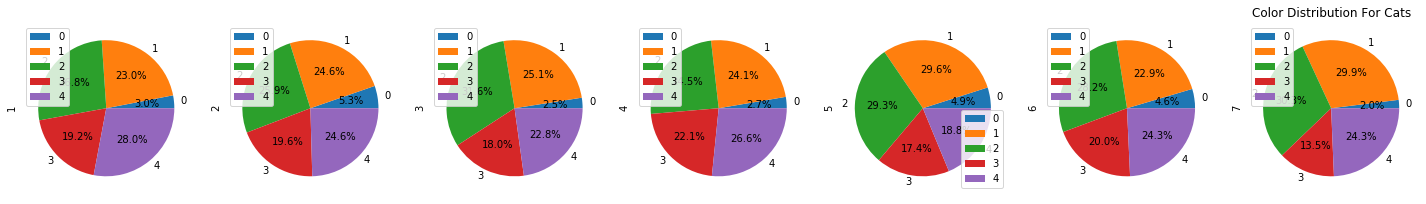

In [103]:
#See what is is the timeline of black cats adoption
df2=pd.DataFrame();
for j in sorted(data['Color1'].unique()):
    df=data[(data["Type"]==2) & (data['Color1']==j)];
    df2[str(j)]=(df.groupby('AdoptionSpeed').size().reset_index(name='Count'))['Count']    
df2.plot.pie(subplots=True,figsize=(25,5),autopct='%1.1f%%')
plt.title("Color Distribution For Cats")

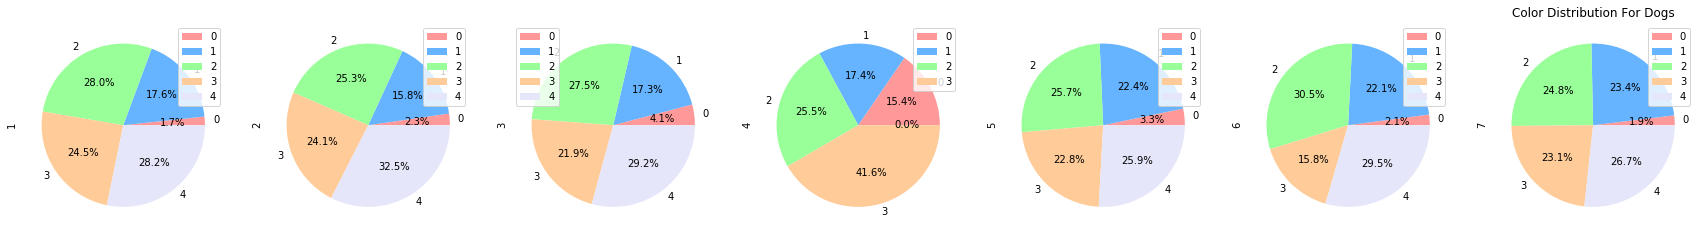

In [105]:
df2=pd.DataFrame();
for j in sorted(data['Color1'].unique()):
    df=data[(data["Type"]==1) & (data['Color1']==j)];
    df2[str(j)]=(df.groupby('AdoptionSpeed').size().reset_index(name='Count'))['Count']
   
df2.plot.pie(subplots=True,figsize=(30,5),autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"#E6E6FA"])
plt.title("Color Distribution For Dogs");


We see that although in cats, there is no specific preference of colors, in Dogs, Yellow Dogs are more likely to be picked up in the first week. Also Yellow Dogs have never gone unadopted till now.
Next let us see what is the age distribution of the plots.
We see there are large outliers in the age. And mean age is 10.45 months derived from an earlier observation.

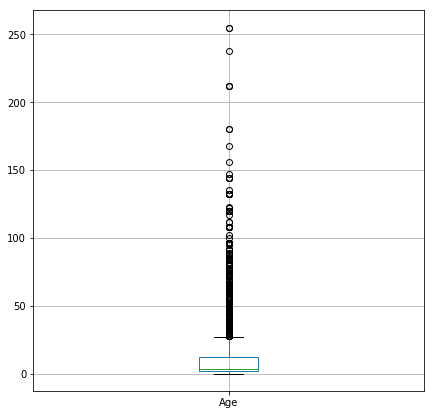

In [108]:
#lets do a box plot of the age of dogs
boxplot=data.boxplot(column=['Age'],figsize=(7,7))

Let us see if the age has any effect on the Adoption Speed. We see that defitely, older pets have stayed longer as we see more dots on the Category 4. Most of the pets that were adopted the same day were less than 120 months old (i.e) 8 years old.
Let us check if the trend is different for cats and dogs.

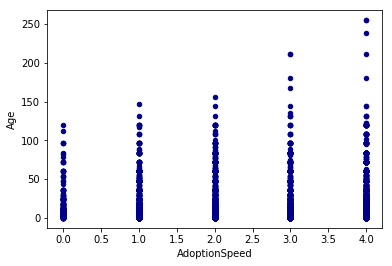

In [110]:
data.plot.scatter(x='AdoptionSpeed',y='Age',c='DarkBlue');

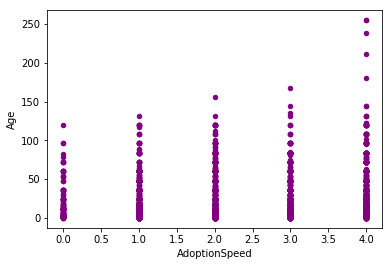

In [115]:
data[data['Type']==1].plot.scatter(x='AdoptionSpeed',y='Age',c='purple');#Dogs

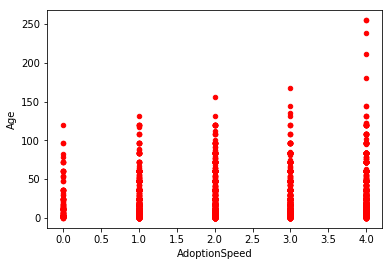

In [113]:
data[data['Type']==1].plot.scatter(x='AdoptionSpeed',y='Age',c='red');#Cats

The trends are pretty similar in both Cats and Dogs.

That is the end of of our Exploratory Data Analysis.
Next let us check if length of Description has anything to do with the Adoption Speed.

In [120]:
data['DescLen']=data['Description'].str.split().str.len()

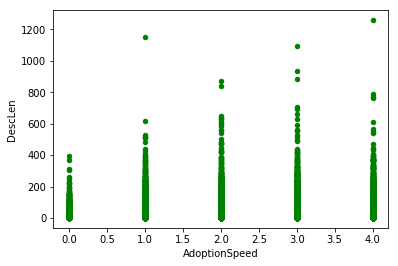

In [122]:
data.plot.scatter(x='AdoptionSpeed',y='DescLen',c='green')

In General, see that a Description of less than 400 words gets you a good chance of adopted within the same day.
That is the end of the EDA for this data.